# QF600 Asset Pricing
## Behavioural Finance
### Chia Jun Xian Edmund

Assume Barberis, Huang, and Santos economy where investor receives utility from consumption as well as recent financial gain or loss. Use these parameters:

delta = 0.99, gamma = 1, lambda = 2

Consumption growth has lognormal distribution:

lng = 0.02 + 0.02ε

where ε is standard normal random variable. Simulate probability distribution for consumption growth with (at least) 10e4 random draws from standard normal distribution.

With these parameters, risk-free rate is around 3% per year:

Rf = e^0.0198 / 0.99 = 1.0303

 Define x as one plus dividend yield for market portfolio:

 
 x = (1 + P / D) * D / P = 1 + D / P
 

and define error term:

e(x) = 0.99bE[v(xg)] + 0.99x - 1

where utility from recent financial gain or loss is given by:

v(R) = R - 1.0303 for R >= 1.0303

v(R) = 2(R - 1.0303) for R <> 1.0303

Solve for e(x) = 0 to find equilibrium value of x, using bisection search:

1. Set x– = 1 and x+ = 1.1, and use simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0 ⇒ solution must lie between x– and x+
2. Set x0 = 0.5*(x– + x+) and use simulated distribution of consumption growth to calculate e(x0)
3. If |e(x0)| < 10–5, then you have converged to solution
4. Otherwise if e(x0) < 0, then solution lies between x0 and x+ ⇒ repeat from step 2 with x– = x0
5. Otherwise if e(x0) > 0, then solution lies between x– and x0 ⇒ repeat from step 2 with x+ = x0
6. Repeat for b0 in range from 0 to 10, in increments of 0.1 (or less). 

Calculate price-dividend ratio for market portfolio:

P / D = 1 / (x - 1)
 
Plot price-dividend ratio (on vertical axis) vs b0.

Calculate expected market return:

E(Rm) = E(xg) = xe^0.0202

Plot equity premium (on vertical axis) vs b0.

Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def consumption_growth():
    
    # simulate epsilon using standard normal distribution
    epsilon = \
        np \
            .random \
                .standard_normal()

    # consumption growth formula
    g = \
        np \
            .exp(
                0.02 + 0.02 * epsilon
            )

    return g

In [24]:
# monte carlo trials
trials = 100000

# placeholder to store all the consumption growth values
g = []

np.random.seed(1)

# simulate
for trial in range(trials):
    
    g.append(consumption_growth())

In [25]:
# risk free calc
delta = 0.99
gamma = 1
lamda = 2

# rf = np.exp(gamma * (np.mean(g) - 1) - 0.5 * (gamma ** 2) * (np.std(g) ** 2)) * (1 / delta)
rf = 1 / (delta * np.mean(np.array(g) ** - gamma))

1.0307232637606483

In [4]:
def expected_utility_calc(kappa, g):

    Eu = \
        np.mean(
            np.where(
                kappa * g >= 1.0303,
                kappa * g - 1.0303,
                2 * (kappa * g - 1.0303)
            )
        )

    return Eu

def error(b, utility, kappa):

    err = 0.99 * b * utility + 0.99 * kappa - 1
    
    return err

In [5]:
b =  \
    np \
        .linspace(
            0, 
            10, 
            num = 201
        )

kappa_results = []

for i in b:
    
    # confirm that solution lies between start and end
    start = 1
    end = 1.1

    start_utility = \
        expected_utility_calc(
            np.full((1, trials), start), 
            g
            )
    
    end_utility = \
        expected_utility_calc(
            np.full((1, trials), end), 
            g
        )

    if (error(i, start_utility, start) * error(i, end_utility, end)) > 0:
    
        print('solution does not lie between kappa_ and kappa+')

    error_term = 999

    # bisection search, while absolute of error term greater than
    while abs(error_term) > 10e-5:

        # set kappa as mid of start and end
        kappa0_single = 0.5 * (start + end)

        # create array of kappa to multiply with simulated consumptiong growth
        kappa0 = np.full((1, trials), kappa0_single)

        # calculate the E(v(kappa * g))
        Eu = expected_utility_calc(kappa0, g)

        # calculate error term
        error_term = error(i, Eu, kappa0_single)

        # if error term < 0 means kappa < answer < 1.1
        if error_term < 0:

            start = kappa0_single

        # if error term > 0 means 1 < answer < kappa
        if error_term > 0:
            
            end = kappa0_single

        # if error term converge than thats the kappa
        if abs(error_term) < 10e-5:

            kappa_results.append(kappa0_single)

In [6]:
# creating df 
df = pd.DataFrame(kappa_results).rename(columns = {0 : 'kappa'})

df['b'] = b

# Calculate price-dividend ratio for market portfolio:

#### P / D = 1 / (x - 1)
 
#### Plot price-dividend ratio (on vertical axis) vs b0.

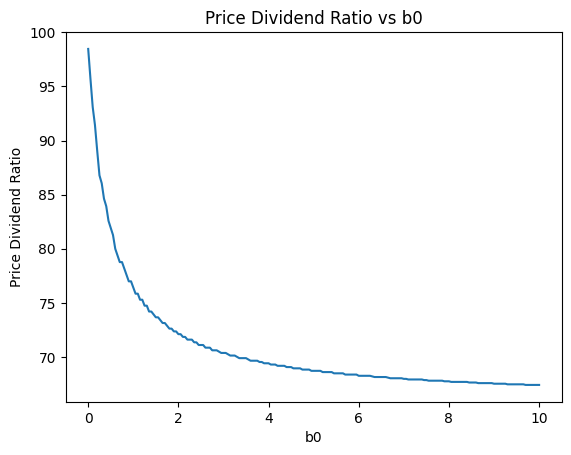

In [7]:
# plotting price dividend ratio

df['price_dividend_ratio'] = 1 / (df.kappa - 1)

plt.plot(
    df.b, 
    df.price_dividend_ratio
    )

plt \
    .xlabel('b0')

plt \
    .ylabel('Price Dividend Ratio')

plt \
    .title('Price Dividend Ratio vs b0');

## Calculate expected market return:

#### E(Rm) = E(xg) = xe^0.0202

#### Plot equity premium (on vertical axis) vs b0.

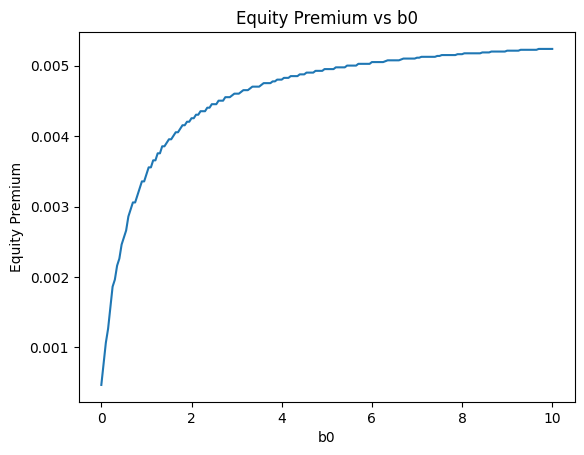

In [9]:
#plotting equity premium
Rf = \
    np.exp(0.0198) / 0.99

df['equity_premium'] = df.kappa * np.exp(0.0202)

plt.plot(df.b, df.equity_premium - Rf)

plt \
    .xlabel('b0')

plt \
    .ylabel('Equity Premium')

plt \
    .title('Equity Premium vs b0');

## Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ.

v(∙) represents utility from recent financial gain or loss, it is a piecewise-linear function where utility from gain and loss are defined by 2 functions, one for gain, the other for loss. The functions are measured relative to a reference level based on risk-free rate. 

b0 determines the extent to which utility from recent financial gains or losses contribute to an investor's lifetime utility. As b0 increases, equity risk premium should increase at a decreasing rate (concave).

λ is the degree of loss aversion where investors are more sensitive to shortfall in financial gain